# Zadanie 8 - SGD - Dominik Strzałko - 434788

Ciekawe linki:
1. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
2. https://datascience.stackexchange.com/questions/25235/sklearn-sgdclassifier-yields-lower-accuracy-than-logisticregression
3. https://adventuresindatascience.wordpress.com/2014/12/30/minibatch-learning-for-large-scale-data-using-scikit-learn/
4. https://github.com/ageron/handson-ml2/blob/master/04_training_linear_models.ipynb

# **0.** Import bibliotek i pobranie zbioru

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [ ]:
df =pd.read_csv('mushrooms.tsv', sep='\t')

In [ ]:
df.head()

,e,b,s,w,t,l,f,c,b.1,n,e.1,c.1,s.1,s.2,w.1,w.2,p,w.3,o,p.1,n.1,n.2,m
0,p,x,y,n,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,n,v,g
1,e,b,y,w,t,a,f,c,b,w,e,c,s,s,w,w,p,w,o,p,n,n,m
2,e,b,s,w,t,l,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,s,m
3,e,x,y,y,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
4,e,s,f,g,f,n,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,v,u


# **1.** Preprocessing danych, przygotowanie zbiorów oraz data analysys

### **1.1.** Można zamienić dane na wartości numeryczne (gorsza metoda)

In [ ]:
# find all non numeric values across the whole DataFrame
mask = df.applymap(np.isreal)
rows, cols = np.where(~mask)

# create the replacement dictionary 
replacements = {k: i for i, k in enumerate(np.unique(df.values[rows, cols]), 10)}

# apply the replacements
res = df.replace(replacements)
res.e.replace((15, 24), (1, 0), inplace=True)
print(res)

      e   b   s   w   t   l   f   c  ...  w.2   p  w.3   o  p.1  n.1  n.2   m
0     0  31  32  22  27  24  16  13  ...   30  24   30  23   24   22   29  17
1     1  12  32  30  27  11  16  13  ...   30  24   30  23   24   22   22  21
2     1  12  26  30  27  20  16  13  ...   30  24   30  23   24   19   26  21
3     1  31  32  32  27  20  16  13  ...   30  24   30  23   24   22   22  21
4     1  26  16  17  16  22  16  13  ...   30  24   30  23   24   19   29  28
...  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ..  ...  ..  ...  ...  ...  ..
7251  0  19  32  22  16  16  16  13  ...   30  24   30  23   15   30   29  14
7252  1  19  26  22  16  22  11  13  ...   23  24   23  23   24   12   13  20
7253  1  16  26  22  16  22  11  13  ...   23  24   23  23   24   12   13  20
7254  0  19  32  22  16  32  16  13  ...   30  24   30  23   15   30   29  20
7255  1  31  26  22  16  22  11  13  ...   23  24   23  23   24   23   13  20

[7256 rows x 23 columns]


### **1.1.2.** Można też wykorzystać metodę "get_dummies" (lepsza)

In [ ]:
pd.get_dummies(df)

,e_e,e_p,b_b,b_c,b_f,b_k,b_s,b_x,s_f,s_g,s_s,s_y,w_b,w_c,w_e,w_g,w_n,w_p,w_r,w_u,w_w,w_y,t_f,t_t,l_a,l_c,l_f,l_l,l_m,l_n,l_p,l_s,l_y,f_a,f_f,c_c,c_w,b.1_b,b.1_n,n_b,...,w.2_n,w.2_o,w.2_p,w.2_w,w.2_y,p_p,w.3_n,w.3_o,w.3_w,w.3_y,o_n,o_o,o_t,p.1_e,p.1_f,p.1_l,p.1_n,p.1_p,n.1_b,n.1_h,n.1_k,n.1_n,n.1_o,n.1_r,n.1_u,n.1_w,n.1_y,n.2_a,n.2_c,n.2_n,n.2_s,n.2_v,n.2_y,m_d,m_g,m_l,m_m,m_p,m_u,m_w
0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,1,...,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0
7252,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
7253,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
7254,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,1,...,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0


### **1.2.** Sprawdzenie korelacji między parametrami

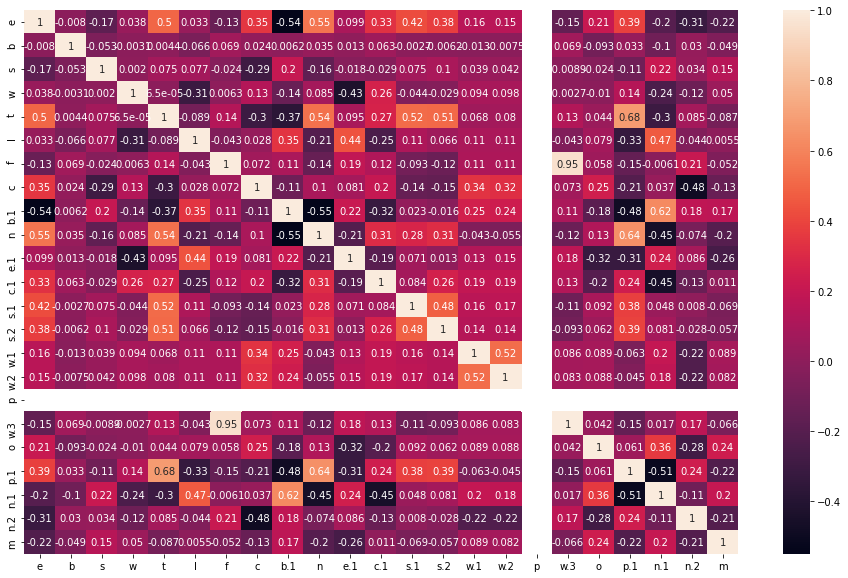

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(res.corr(),annot=True)
plt.show()

bardzo skorelowane (>0.20) z parametrem "jadalności", są parametry **(t, c, n, c1, s1, s2, o, p1)**

In [ ]:
FEATURES = [
    't',
    'c',
    'n',
    'c.1',
    's.1',
    's.2',
    'o',
    'p.1'
]

Najbardziej skorelowane (>0.50) z parametrem "jadalności", są parametry **(t, n)**

In [ ]:
FEATURES_v2 = [
    't',
    'n'
]

### **1.3.** Przygotowanie różnych zbiorów train/test

##### **1.3.1.** Zbiór ze wszystkimi cechami

In [ ]:
y_1 = df.e
x_1 = df.drop('e', axis=1)

In [ ]:
x_1 = pd.get_dummies(x_1)

In [ ]:
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_1,y_1 , test_size=0.2,train_size=0.8, random_state=5)

In [ ]:
y_train_1.value_counts()

e    3019
p    2785
Name: e, dtype: int64

##### **1.3.2.** Zbiór z cechami o stopniu skorelowania >0.2 **(t, c, n, c1, s1, s2, o, p1)** z y

In [ ]:
res_f1 = df[FEATURES + ['e']]
y_2 = res_f1.e
x_2 = res_f1.drop('e', axis=1)

In [ ]:
x_2 = pd.get_dummies(x_2)

In [ ]:
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_2,y_2 , test_size=0.2,train_size=0.8, random_state=5)

In [ ]:
y_train_2.value_counts()

e    3019
p    2785
Name: e, dtype: int64

##### **1.3.3.** Zbiór z cechami o stopniu skorelowania >0.5 **(t, n)** z y

In [ ]:
res_f2 = df[FEATURES_v2 + ['e']]
y_3 = res_f2.e
x_3 = res_f2.drop('e', axis=1)

In [ ]:
x_3 = pd.get_dummies(x_3)

In [ ]:
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(x_3,y_3 , test_size=0.2,train_size=0.8, random_state=5)

In [ ]:
y_train_3.value_counts()

e    3019
p    2785
Name: e, dtype: int64

# **2.** Klasyfikacja SGD **(Krok bonusowy)** 

### **2.1.** SGD dla wszystkich cech

In [ ]:
model = make_pipeline( SGDClassifier(random_state=5))  # definicja modelu (loss='modified_huber')) domyślnie jest loss='hinge'
model.fit(x_train_1, y_train_1)  # dopasowanie modelu
y_predicted_1 = model.predict(x_test_1)  # predykcja wyników na podstawie modelu

### **2.1.1** Sprawdzenie Accuarcy, Precision, recall oraz f1-score (+ Tabela porównawcza)

In [ ]:
test_df_1 = pd.DataFrame({'Actual': y_test_1, 'Predicted': y_predicted_1}) #Porównanie wartości prawidłowych z przewidzianymi
test_df_1.head(20)

,Actual,Predicted
2005,e,e
391,p,p
1545,e,e
3612,p,p
1225,e,e
453,e,e
2030,e,e
2225,e,e
5582,p,p
2288,e,e


In [ ]:
print(classification_report(test_df_1.Actual,test_df_1.Predicted))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       746
           p       1.00      1.00      1.00       706

    accuracy                           1.00      1452
   macro avg       1.00      1.00      1.00      1452
weighted avg       1.00      1.00      1.00      1452



### **2.2.** SGD dla FEATURES (>0.2)

In [ ]:
model = make_pipeline( SGDClassifier(random_state=5))  # definicja modelu (loss='modified_huber')) domyślnie jest loss='hinge'
model.fit(x_train_2, y_train_2)  # dopasowanie modelu
y_predicted_2 = model.predict(x_test_2)  # predykcja wyników na podstawie modelu

### **2.2.1** Sprawdzenie Accuarcy, Precision, recall oraz f1-score (+ Tabela porównawcza)

In [ ]:
test_df_2 = pd.DataFrame({'Actual': y_test_2, 'Predicted': y_predicted_2}) #Porównanie wartości prawidłowych z przewidzianymi
test_df_2.head(20)

,Actual,Predicted
2005,e,e
391,p,p
1545,e,e
3612,p,p
1225,e,e
453,e,e
2030,e,e
2225,e,e
5582,p,p
2288,e,e


In [ ]:
print(classification_report(test_df_2.Actual,test_df_2.Predicted))

              precision    recall  f1-score   support

           e       0.97      0.99      0.98       746
           p       0.98      0.96      0.97       706

    accuracy                           0.98      1452
   macro avg       0.98      0.97      0.98      1452
weighted avg       0.98      0.98      0.98      1452



### **2.3.** SGD dla FEATURES_v2 (>0.5)

In [ ]:
model = make_pipeline(SGDClassifier(random_state=5))  # definicja modelu (loss='modified_huber')) domyślnie jest loss='hinge'
model.fit(x_train_3, y_train_3)  # dopasowanie modelu
y_predicted_3 = model.predict(x_test_3)  # predykcja wyników na podstawie modelu

### **2.3.1** Sprawdzenie Accuarcy, Precision, recall oraz f1-score (+ Tabela porównawcza)

In [ ]:
test_df_3 = pd.DataFrame({'Actual': y_test_3, 'Predicted': y_predicted_3}) #Porównanie wartości prawidłowych z przewidzianymi
test_df_3.head(20)

,Actual,Predicted
2005,e,e
391,p,p
1545,e,e
3612,p,e
1225,e,e
453,e,e
2030,e,e
2225,e,e
5582,p,p
2288,e,e


In [ ]:
print(classification_report(test_df_3.Actual,test_df_3.Predicted))

              precision    recall  f1-score   support

           e       0.75      0.90      0.82       746
           p       0.87      0.69      0.77       706

    accuracy                           0.80      1452
   macro avg       0.81      0.79      0.79      1452
weighted avg       0.81      0.80      0.79      1452



### **2.4.** Wnioski

Klasyfikacja przy pomocy SGD okazała się świetnym rozwiązaniem.

Accuracy dla wszystkich cech wynosi: **100%**.

Accuracy dla 8 najbardziej skorelowanych z jadalnością cech wynosi: **98%**.

Accuracy dla 2 najbardziej skorelowanych z jadalnością cech wynosi **80%**.

Wyniki wydają się być jak najbardziej logiczne. Im więcej cech, tym większy wynik dokładności.


# **3.** Minibatch SGD **(Główne zadanie)** 

In [ ]:
def batch_iterate(x, y, batch_size):
    """Iterator dzielący dane na mini-batche"""
    assert len(x) == len(y)
    dataset_size = len(x)
    current_index = 0
    while current_index < dataset_size:
        x_batch = x[current_index : current_index + batch_size]
        y_batch = y[current_index : current_index + batch_size]
        yield x_batch, y_batch
        current_index += batch_size

### **3.1.** Minibatch SGD dla wszystkich cech

In [ ]:
# Mini-batch SGD
model = SGDClassifier(random_state=5)
batch_iterator = batch_iterate(x_train_1, y_train_1, batch_size=25) # batch_size 25 jest udany
for x_batch, y_batch in batch_iterator:
    model.partial_fit(x_batch, y_batch, classes=np.unique(y_1))

### **3.1.1** Sprawdzenie Accuarcy, Precision, recall oraz f1-score (+ Tabela porównawcza)

In [ ]:
y_predicted_1 = model.predict(x_test_1)  # predykcja wyników na podstawie modelu

In [ ]:
test_df = pd.DataFrame({'Actual': y_test_1, 'Predicted': y_predicted_1}) #Porównanie wartości prawidłowych z przewidzianymi
test_df.head(20)

,Actual,Predicted
2005,e,e
391,p,p
1545,e,e
3612,p,p
1225,e,e
453,e,e
2030,e,e
2225,e,e
5582,p,p
2288,e,e


In [ ]:
print(classification_report(test_df.Actual,test_df.Predicted))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       746
           p       1.00      1.00      1.00       706

    accuracy                           1.00      1452
   macro avg       1.00      1.00      1.00      1452
weighted avg       1.00      1.00      1.00      1452



### **3.2.** Minibatch SGD dla FEATURES (>0.2)

In [ ]:
# Mini-batch SGD
model = SGDClassifier(random_state=5)
batch_iterator = batch_iterate(x_train_2, y_train_2, batch_size=25) # batch_size 25 jest udany
for x_batch, y_batch in batch_iterator:
    model.partial_fit(x_batch, y_batch, classes=np.unique(y_2))

### **3.2.1** Sprawdzenie Accuarcy, Precision, recall oraz f1-score (+ Tabela porównawcza)

In [ ]:
y_predicted_2 = model.predict(x_test_2)  # predykcja wyników na podstawie modelu

In [ ]:
test_df = pd.DataFrame({'Actual': y_test_2, 'Predicted': y_predicted_2}) #Porównanie wartości prawidłowych z przewidzianymi
test_df.head(20)

,Actual,Predicted
2005,e,e
391,p,p
1545,e,e
3612,p,e
1225,e,e
453,e,e
2030,e,e
2225,e,e
5582,p,p
2288,e,e


In [ ]:
print(classification_report(test_df.Actual,test_df.Predicted))

              precision    recall  f1-score   support

           e       0.95      0.74      0.83       746
           p       0.78      0.95      0.86       706

    accuracy                           0.85      1452
   macro avg       0.86      0.85      0.84      1452
weighted avg       0.86      0.85      0.84      1452



### **3.3.** Minibatch SGD dla FEATURES (>0.5)

In [ ]:
# Mini-batch SGD
model = SGDClassifier(random_state=5)
batch_iterator = batch_iterate(x_train_3, y_train_3, batch_size=25) # batch_size 25 jest udany
for x_batch, y_batch in batch_iterator:
    model.partial_fit(x_batch, y_batch, classes=np.unique(y_3))

### **3.3.1** Sprawdzenie Accuarcy, Precision, recall oraz f1-score (+ Tabela porównawcza)

In [ ]:
y_predicted_3 = model.predict(x_test_3)  # predykcja wyników na podstawie modelu

In [ ]:
test_df = pd.DataFrame({'Actual': y_test_3, 'Predicted': y_predicted_3}) #Porównanie wartości prawidłowych z przewidzianymi
test_df.head(20)

,Actual,Predicted
2005,e,e
391,p,p
1545,e,e
3612,p,p
1225,e,p
453,e,e
2030,e,e
2225,e,e
5582,p,p
2288,e,e


In [ ]:
print(classification_report(test_df.Actual,test_df.Predicted))

              precision    recall  f1-score   support

           e       0.85      0.64      0.73       746
           p       0.70      0.88      0.78       706

    accuracy                           0.76      1452
   macro avg       0.78      0.76      0.76      1452
weighted avg       0.78      0.76      0.76      1452



### **3.4.** Wnioski

Klasyfikacja przy pomocy mini-batch SGD okazała się równie dobrym rozwiązaniem. (dla batch size 25)

Accuracy dla wszystkich cech wynosi: **100%**.

Accuracy dla 8 najbardziej skorelowanych z jadalnością cech wynosi: **85%**.

Accuracy dla 2 najbardziej skorelowanych z jadalnością cech wynosi **76%**.

Wyniki wydają się być jak najbardziej logiczne. Im więcej cech, tym większy wynik dokładności.